### Stock  Market Prediction And Forecasting Using Stacked LSTM and Keras and Tensorflow

![](download.png)

![](download.png)

<img src = "T.jpg"/>

1.	We will Collect the Stock Data  - - AAPL (OCT 2016 - 20 OCT 2021) 
2.	Preprocess the Data and Split the Data into Training and Testing
3.	Create an Stacked LSTM model
4.	Predict the test Data And Plot the Output
5.	Predict the future 30 days and plot the output


In [1]:
!pip install pandas_datareader

In [2]:
# Data Collection
import pandas_datareader as pdr

In [3]:
key="ad0b50dc21508ca410723cd23f3e11785631ab17"

In [4]:
df = pdr.get_data_tiingo('AAPL',api_key=key)

In [5]:
df.to_csv('AAPL.csv')

In [6]:
import pandas as pd

In [7]:
df = pd.read_csv('AAPL.csv')

In [8]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2016-10-24 00:00:00+00:00,117.65,117.74,117.00,117.10,23538673,27.579252,27.600350,27.426880,27.450322,94154692,0.0,1.0
1,AAPL,2016-10-25 00:00:00+00:00,118.25,118.36,117.31,117.95,48128970,27.719903,27.745689,27.499550,27.649577,192515880,0.0,1.0
2,AAPL,2016-10-26 00:00:00+00:00,115.59,115.70,113.31,114.31,66134219,27.096351,27.122137,26.561879,26.796297,264536876,0.0,1.0
3,AAPL,2016-10-27 00:00:00+00:00,114.48,115.86,114.10,115.39,34562045,26.836148,27.159644,26.747069,27.049468,138248180,0.0,1.0
4,AAPL,2016-10-28 00:00:00+00:00,113.72,115.21,113.45,113.87,37861662,26.657990,27.007273,26.594697,26.693153,151446648,0.0,1.0


adjHigh - adjusted price amends a stock's price to reflect that stock's value after accounting for any corporate actions. It is often used when examining historical returns or doing a detailed analysis of past performance.

spliFactor - The most common splits are 2-for-1 or 3-for-1, which means a stockholder gets two or three shares, respectively, for every share held.

In [9]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,AAPL,2021-10-15 00:00:00+00:00,144.84,144.8950,143.51,143.770,67940334,144.84,144.8950,143.51,143.770,67940334,0.0,1.0
1254,AAPL,2021-10-18 00:00:00+00:00,146.55,146.8400,143.16,143.445,85589175,146.55,146.8400,143.16,143.445,85589175,0.0,1.0
1255,AAPL,2021-10-19 00:00:00+00:00,148.76,149.1700,146.55,147.010,76378894,148.76,149.1700,146.55,147.010,76378894,0.0,1.0
1256,AAPL,2021-10-20 00:00:00+00:00,149.26,149.7539,148.12,148.700,58418788,149.26,149.7539,148.12,148.700,58418788,0.0,1.0
1257,AAPL,2021-10-21 00:00:00+00:00,149.48,149.6400,147.87,148.810,61420990,149.48,149.6400,147.87,148.810,61420990,0.0,1.0


In [10]:
df.shape

(1258, 14)

In [11]:
df1 = df.reset_index()['close']

In [12]:
df1

0       117.65
1       118.25
2       115.59
3       114.48
4       113.72
         ...  
1253    144.84
1254    146.55
1255    148.76
1256    149.26
1257    149.48
Name: close, Length: 1258, dtype: float64

In [13]:
df1.shape

(1258,)

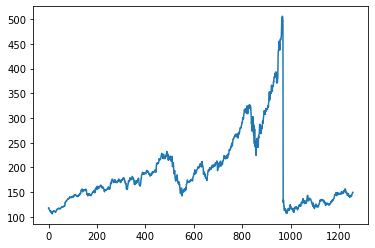

In [14]:
import matplotlib.pyplot as plt
plt.plot(df1)

### LSTM are sensitive to the scale of the data , so we apply MinMax Scaler

In [15]:
import numpy as np

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [16]:
df1.shape

(1258, 1)

In [17]:
df1

array([[0.02982167],
       [0.03132025],
       [0.02467656],
       ...,
       [0.10752285],
       [0.10877167],
       [0.10932114]])

In [18]:
## Splitting data into train test split
training_size = int(len(df1)*0.65)
test_size = len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [19]:
## Length pf the training data and testing data
training_size,test_size

(817, 441)

In [20]:
## convert an array of values into a dataset matrix

import numpy

def create_dataset(dataset,time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step),0]   ## i = 0 , 0,1,2,3...99
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [21]:
## reshape into X=t,t+1,t+2,t+4 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data,time_step)
X_test, y_test = create_dataset(test_data,time_step)

In [22]:
print(X_train.shape),print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [23]:
print(X_test.shape),print(y_test.shape)

(340, 100)
(340,)


(None, None)

In [45]:
## Reshape input to be [sample, time steps, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1], 1) ## we create three dimensional we are giving X_train.shape[1],1 as input to LSTM
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1], 1)

In [25]:
## Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [26]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1))) ## 50 is hidden layer
model.add(LSTM(50,return_sequences=True))  ## Stack LSTM one after other LSTM 
model.add(LSTM(50))
model.add(Dense(1)) #final output
model.compile(loss='mean_squared_error', optimizer='adam')

In [27]:
model.summary() 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 13s 515ms/step - loss: 0.0136 - val_loss: 0.0306
Epoch 2/100
12/12 [==============================] - 3s 288ms/step - loss: 0.0034 - val_loss: 0.0249
Epoch 3/100
12/12 [==============================] - 3s 274ms/step - loss: 0.0015 - val_loss: 0.0220
Epoch 4/100
12/12 [==============================] - 3s 258ms/step - loss: 6.6447e-04 - val_loss: 0.0280
Epoch 5/100
12/12 [==============================] - 3s 243ms/step - loss: 5.6814e-04 - val_loss: 0.0313
Epoch 6/100
12/12 [==============================] - 3s 223ms/step - loss: 5.5066e-04 - val_loss: 0.0267
Epoch 7/100
12/12 [==============================] - 3s 233ms/step - loss: 5.1651e-04 - val_loss: 0.0260
Epoch 8/100
12/12 [==============================] - 3s 276ms/step - loss: 4.9116e-04 - val_loss: 0.0289
Epoch 9/100
12/12 [==============================] - 3s 244ms/step - loss: 4.7332e-04 - val_loss: 0.0284
Epoch 10/100
12/12 [==============================] - 3s 240ms/ste

In [29]:
import tensorflow as tf

In [30]:
tf.__version__

'2.6.0'

In [31]:
## Let Do the prediction and check performance metrics
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [32]:
## Transformback to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)  ##test predict means output for test data

In [33]:
## Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

193.3791963086052

In [34]:
## Test Data RMSE
math.sqrt(mean_squared_error(y_test,test_predict))

210.98462661893123

<function matplotlib.pyplot.show(close=None, block=None)>

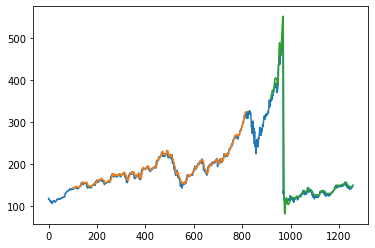

In [35]:
## Plotting
## Shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

## Shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict

## Plot Baseline and Predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show

Blue : Complete Dataset , 

Orange : Train Dataset Prediction , 

Green : Test Dataset Prediction

# Predictions For Next 30 Days

In [36]:
len(test_data)

441

In [46]:
x_input = test_data [341:].reshape(1,-1)
x_input.shape

(1, 100)

In [47]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [48]:
## demonstarate prediction for next 30 days

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape((1, n_steps,1))
        #print(x_input)
        yhat=model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1,n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
print(lst_output)

[0.10746528]
101
1 day input [0.04453269 0.05040212 0.05042709 0.0525251  0.05349918 0.0509516
 0.05404865 0.06186623 0.05976822 0.06104201 0.06513812 0.06181627
 0.06641191 0.07060792 0.06990859 0.06918427 0.06843499 0.07260602
 0.07647735 0.07805085 0.07882512 0.08554373 0.09068885 0.0970578
 0.09373595 0.09840651 0.09688296 0.09973026 0.10849693 0.10682352
 0.10160348 0.09176283 0.10100405 0.09913083 0.1026275  0.10702333
 0.10809731 0.10255258 0.09808182 0.09973026 0.10027973 0.09943054
 0.10402618 0.10300215 0.10327689 0.10097907 0.10085419 0.09963035
 0.10027973 0.10784754 0.10837205 0.11341725 0.11109446 0.10152855
 0.10237774 0.10609921 0.1098956  0.10967081 0.1065238  0.10447575
 0.10712323 0.11841251 0.11519057 0.11688896 0.11973625 0.12135971
 0.12732904 0.12338279 0.12078525 0.10804736 0.10949598 0.10592437
 0.10819721 0.10759778 0.10077926 0.09298666 0.0942105  0.10025476
 0.10270243 0.10292722 0.0990559  0.09041411 0.09271192 0.08939008
 0.09226235 0.08349568 0.088416   0

In [49]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)


In [50]:
import matplotlib.pyplot as plt

In [51]:
len(df1)

1258

In [52]:
df3=df1.tolist()
df3.extend(lst_output)

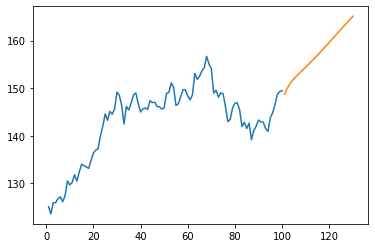

In [54]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

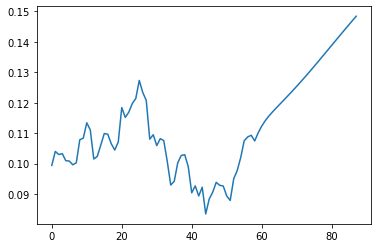

In [55]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

Conclusion : We can tweak the parameters and see how we can improve the model performance, we can try to train on more epochs, say 200 or even more, increase or decrease the BATCH_SIZE and if it does not change to the better, or play around with N_STEPS and LOOKUP_STEPS and see which combination works best.